# CPI VISION


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000

In [3]:
cpi_hist = pd.read_csv('CPI_HistoryMar_23.csv')
cpi_hist.head()

,Month,Category,Value,Percentage Change (From Prior Month)
0,31-03-2023,Headline_CPI,109.0,1.0
1,31-03-2023,Food and non-alcoholic beverages,116.7,1.0
2,31-03-2023,Alcoholic beverages and tobacco,109.2,2.2
3,31-03-2023,Clothing and footwear,103.4,-0.1
4,31-03-2023,Housing and utilities,104.5,0.4


In [4]:
cpi_hist.isna().sum()

Month                                   0
Category                                0
Value                                   0
Percentage Change (From Prior Month)    0
dtype: int64

In [5]:
cpi_hist.duplicated().sum()

0

In [6]:
cpi_hist['Category'].unique()

array(['Headline_CPI', 'Food and non-alcoholic beverages',
       'Alcoholic beverages and tobacco', 'Clothing and footwear',
       'Housing and utilities', 'Household contents and services',
       'Health', 'Transport', 'Communication', 'Recreation and culture',
       'Education', 'Restaurants and hotels ',
       'Miscellaneous goods and services'], dtype=object)

In [7]:
cpi_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Month                                 195 non-null    object 
 1   Category                              195 non-null    object 
 2   Value                                 195 non-null    float64
 3   Percentage Change (From Prior Month)  195 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.2+ KB


In [8]:
cpi_hist['Month'] = pd.to_datetime(cpi_hist['Month'])

/var/folders/mc/wtr2th093fscq0l5wyyg1yg00000gq/T/ipykernel_33151/3176923084.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cpi_hist['Month'] = pd.to_datetime(cpi_hist['Month'])


In [10]:
cpi_pivot = cpi_pivot(index = 'Month', columns = 'Category', values = 'Value').reset_index()#changing from a long format to a wide format,
cpi_pivot['Month'] = pd.to_datetime(cpi_pivot['Month'])
cpi_pivot = cpi_pivot.sort_values("Month").reset_index(drop=True)
cpi_pivot


NameError: name 'cpi' is not defined

In [ ]:
cpi_pivot.shape

(16, 15)

In [ ]:
cpi_pivot['year_month'] = pd.to_datetime(cpi_pivot['Month'], errors='coerce').dt.strftime('%Y-%m')
cpi_pivot['Month'] = pd.to_datetime(cpi_pivot['Month'], errors='coerce')
cpi_pivot

/var/folders/mc/wtr2th093fscq0l5wyyg1yg00000gq/T/ipykernel_32600/3852830178.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cpi_pivot['year_month'] = pd.to_datetime(cpi_pivot['Month'], errors='coerce').dt.strftime('%Y-%m')
/var/folders/mc/wtr2th093fscq0l5wyyg1yg00000gq/T/ipykernel_32600/3852830178.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cpi_pivot['Month'] = pd.to_datetime(cpi_pivot['Month'], errors='coerce')


Category,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport,year_month
0,2022-02-28,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02
1,2023-02-28,106.9,103.5,99.8,104.4,115.6,107.9,108.5,106.6,104.1,107.7,103.3,108.8,110.6,2023-02
2,2022-04-30,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1,2022-04
3,2022-06-30,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3,2022-06
4,2022-09-30,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0,2022-09
5,2022-11-30,106.4,102.6,99.2,104.4,111.9,106.8,104.7,105.2,103.8,104.7,102.8,108.0,113.1,2022-11
6,2022-01-31,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9,2022-01
7,2023-01-31,106.5,102.9,99.4,104.4,114.4,107.1,104.9,106.6,104.1,105.4,103.4,106.8,109.9,2023-01
8,2022-03-31,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7,2022-03
9,2023-03-31,109.2,103.4,99.7,110.4,116.7,109.0,109.1,107.8,104.5,107.9,104.2,109.6,112.9,2023-03


Visaualzing CPI categories

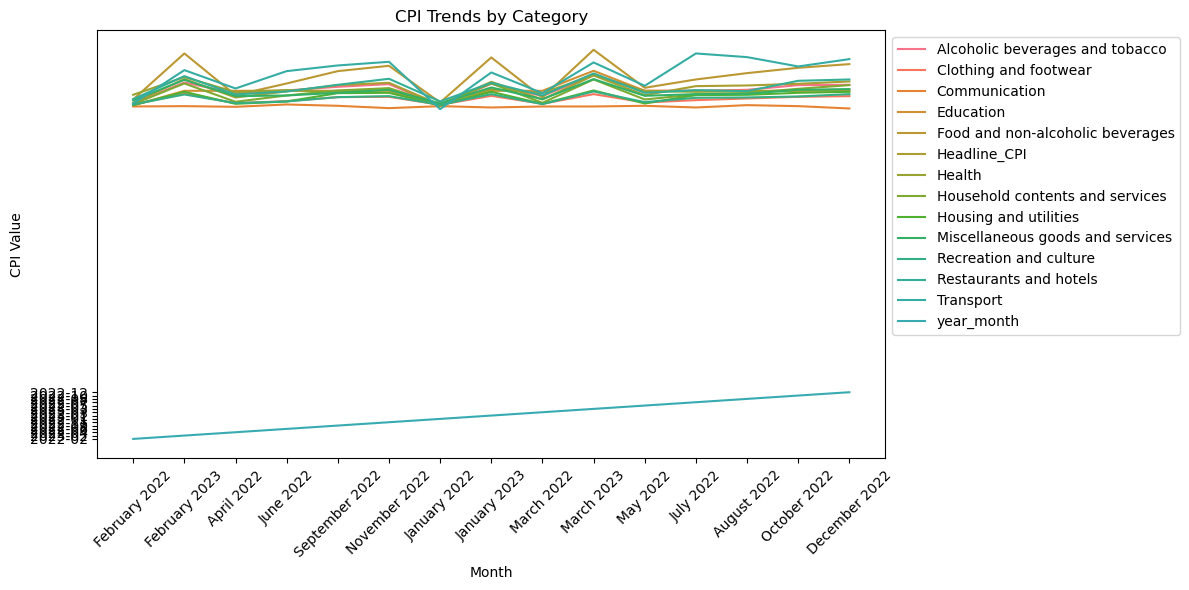

In [ ]:


# Set the figure size
plt.figure(figsize=(12, 6))

# Format the 'Month' column to include month names
cpi_pivot['Month'] = cpi_pivot['Month'].apply(lambda x: pd.to_datetime(x).strftime('%B %Y'))

# Set a larger Seaborn color palette with 12 distinct colors
colors = sns.color_palette('husl', 12 * 2)

# Plot CPI trends for each category
for i, column in enumerate(cpi_pivot.columns[1:]):
    plt.plot(cpi_pivot['Month'], cpi_pivot[column], label=column, color=colors[i])

# Customize the plot
plt.xlabel('Month')
plt.ylabel('CPI Value')
plt.title('CPI Trends by Category')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
date_str = '2023-04-30'
date_obj = pd.to_datetime(date_str)
new_row = pd.DataFrame({'Month': [date_obj]})
cpi_pivot = pd.concat([cpi_pivot, new_row]).reset_index(drop=True)
cpi_pivot

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport,year_month
0,February 2022,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02
1,February 2023,106.9,103.5,99.8,104.4,115.6,107.9,108.5,106.6,104.1,107.7,103.3,108.8,110.6,2023-02
2,April 2022,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1,2022-04
3,June 2022,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3,2022-06
4,September 2022,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0,2022-09
5,November 2022,106.4,102.6,99.2,104.4,111.9,106.8,104.7,105.2,103.8,104.7,102.8,108.0,113.1,2022-11
6,January 2022,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9,2022-01
7,January 2023,106.5,102.9,99.4,104.4,114.4,107.1,104.9,106.6,104.1,105.4,103.4,106.8,109.9,2023-01
8,March 2022,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7,2022-03
9,March 2023,109.2,103.4,99.7,110.4,116.7,109.0,109.1,107.8,104.5,107.9,104.2,109.6,112.9,2023-03


#### Converting the 'Month' column back to appropriate datatype and extracting year and month from the 'Month' column

In [ ]:
cpi_pivot['year_month'] = pd.to_datetime(cpi_pivot['Month'], errors='coerce').dt.strftime('%Y-%m')
cpi_pivot['Month'] = pd.to_datetime(cpi_pivot['Month'], errors='coerce')
cpi_pivot

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport,year_month
0,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02
1,2023-02-01,106.9,103.5,99.8,104.4,115.6,107.9,108.5,106.6,104.1,107.7,103.3,108.8,110.6,2023-02
2,2022-04-01,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1,2022-04
3,2022-06-01,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3,2022-06
4,2022-09-01,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0,2022-09
5,2022-11-01,106.4,102.6,99.2,104.4,111.9,106.8,104.7,105.2,103.8,104.7,102.8,108.0,113.1,2022-11
6,2022-01-01,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9,2022-01
7,2023-01-01,106.5,102.9,99.4,104.4,114.4,107.1,104.9,106.6,104.1,105.4,103.4,106.8,109.9,2023-01
8,2022-03-01,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7,2022-03
9,2023-03-01,109.2,103.4,99.7,110.4,116.7,109.0,109.1,107.8,104.5,107.9,104.2,109.6,112.9,2023-03


In [ ]:
# cpi_pivot['year_month'] = pd.to_datetime(cpi_pivot['Month'], format='%Y-%b').dt.strftime('%Y-%m')

# cpi_pivot['Month']= pd.to_datetime(cpi_pivot['Month'])
# cpi_pivot

In [ ]:
cpi_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Month                             16 non-null     datetime64[ns]
 1   Alcoholic beverages and tobacco   15 non-null     float64       
 2   Clothing and footwear             15 non-null     float64       
 3   Communication                     15 non-null     float64       
 4   Education                         15 non-null     float64       
 5   Food and non-alcoholic beverages  15 non-null     float64       
 6   Headline_CPI                      15 non-null     float64       
 7   Health                            15 non-null     float64       
 8   Household contents and services   15 non-null     float64       
 9   Housing and utilities             15 non-null     float64       
 10  Miscellaneous goods and services  15 non-null     fl

In [ ]:
cpi_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Month                             16 non-null     datetime64[ns]
 1   Alcoholic beverages and tobacco   15 non-null     float64       
 2   Clothing and footwear             15 non-null     float64       
 3   Communication                     15 non-null     float64       
 4   Education                         15 non-null     float64       
 5   Food and non-alcoholic beverages  15 non-null     float64       
 6   Headline_CPI                      15 non-null     float64       
 7   Health                            15 non-null     float64       
 8   Household contents and services   15 non-null     float64       
 9   Housing and utilities             15 non-null     float64       
 10  Miscellaneous goods and services  15 non-null     fl

## Cleaning Vehicle Sales dataset

In [ ]:
vehicles = pd.read_csv('Naamsa_Vehicle_Sales.csv')
vehicles.head()

,Month,Local_Passenger_Vehicles,Export_Sales_Passenger_Vehicles,Local_Light_Commercial_Vehicles,Export_Sales_Light_Commercial_Vehicles,Local_Medium_Commercial_Vehicles,Export_Sales_Medium_Commercial_Vehicles,Local_Heavy_Commercial_Vehicles,Export_Sales_Heavy_Commercial_Vehicles,Local_Extra_Heavy_Commercial_Vehicles,Export_Sales_Extra_Heavy_Commercial_Vehicles,Local_Bus_Sales,Export_Sales_Buses,Total_Local Sales,Total_Export_Sales
0,23-Mar,31631,23481,15529,10578,870,18,491,32,1593,25,43,0,50157,34134
1,23-Feb,29976,20079,12972,10244,697,33,435,8,1244,40,28,5,45352,30409
2,23-Jan,31072,11227,10622,9243,461,5,331,28,976,29,47,4,43509,20536
3,22-Dec,28793,16844,10438,9406,865,15,417,11,1198,26,72,0,41783,26302
4,22-Nov,32859,23522,13477,10710,900,32,546,13,1551,33,80,0,49413,34310


#### We can see that the "Month" column doesn't have the year. However, we already know that we are working with dates from March 2023 going backward. We will convert this column to its appropriate data type and extract the month and year from it. The end goal is to be able to merge the previous dataset with this one.

In [ ]:
start_date = datetime.datetime.strptime("2020-12-31", "%Y-%m-%d")
end_date = datetime.datetime.strptime("2023-03-31", "%Y-%m-%d")

# difference between each date. M means one month end
D = 'M'

date_list = pd.date_range(start_date, end_date, freq=D)[::-1]
vehicles['Month'] = date_list
vehicles['Month'] = pd.to_datetime(vehicles['Month'], format='%Y-%b-%d')
vehicles['year_month'] = pd.to_datetime(vehicles['Month'], format='%Y-%b').dt.strftime('%Y-%m')
vehicles.head()

,Month,Local_Passenger_Vehicles,Export_Sales_Passenger_Vehicles,Local_Light_Commercial_Vehicles,Export_Sales_Light_Commercial_Vehicles,Local_Medium_Commercial_Vehicles,Export_Sales_Medium_Commercial_Vehicles,Local_Heavy_Commercial_Vehicles,Export_Sales_Heavy_Commercial_Vehicles,Local_Extra_Heavy_Commercial_Vehicles,Export_Sales_Extra_Heavy_Commercial_Vehicles,Local_Bus_Sales,Export_Sales_Buses,Total_Local Sales,Total_Export_Sales,year_month
0,2023-03-31,31631,23481,15529,10578,870,18,491,32,1593,25,43,0,50157,34134,2023-03
1,2023-02-28,29976,20079,12972,10244,697,33,435,8,1244,40,28,5,45352,30409,2023-02
2,2023-01-31,31072,11227,10622,9243,461,5,331,28,976,29,47,4,43509,20536,2023-01
3,2022-12-31,28793,16844,10438,9406,865,15,417,11,1198,26,72,0,41783,26302,2022-12
4,2022-11-30,32859,23522,13477,10710,900,32,546,13,1551,33,80,0,49413,34310,2022-11


In [ ]:

columns_to_drop = [
    'Local_Passenger_Vehicles', 'Export_Sales_Passenger_Vehicles',
    'Local_Light_Commercial_Vehicles', 'Export_Sales_Light_Commercial_Vehicles',
    'Local_Medium_Commercial_Vehicles', 'Export_Sales_Medium_Commercial_Vehicles',
    'Local_Heavy_Commercial_Vehicles', 'Export_Sales_Heavy_Commercial_Vehicles',
    'Local_Extra_Heavy_Commercial_Vehicles', 'Export_Sales_Extra_Heavy_Commercial_Vehicles',
    'Local_Bus_Sales', 'Export_Sales_Buses'
]


vehicles = vehicles.drop(columns=columns_to_drop)
vehicles.head()

,Month,Total_Local Sales,Total_Export_Sales,year_month
0,2023-03-31,50157,34134,2023-03
1,2023-02-28,45352,30409,2023-02
2,2023-01-31,43509,20536,2023-01
3,2022-12-31,41783,26302,2022-12
4,2022-11-30,49413,34310,2022-11


In [ ]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Month               28 non-null     datetime64[ns]
 1   Total_Local Sales   28 non-null     int64         
 2   Total_Export_Sales  28 non-null     int64         
 3   year_month          28 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.0+ KB


#### Merging the datasets

In [ ]:
cpi_vehicles = cpi_pivot.merge(vehicles[['year_month', 'Total_Local Sales', 'Total_Export_Sales']], on='year_month', how='left')

cpi_vehicles

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport,year_month,Total_Local Sales,Total_Export_Sales
0,2022-01-01,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9,2022-01,41382.0,19089.0
1,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0
2,2022-03-01,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7,2022-03,50607.0,34285.0
3,2022-04-01,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1,2022-04,37107.0,30788.0
4,2022-05-01,104.4,100.9,99.9,104.4,105.3,103.1,104.3,101.8,100.6,102.9,101.0,103.8,105.9,2022-05,39177.0,25786.0
5,2022-06-01,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3,2022-06,41019.0,33054.0
6,2022-07-01,104.4,101.6,99.4,104.4,107.8,105.8,104.1,103.3,103.1,103.4,102.3,104.6,115.6,2022-07,43593.0,31242.0
7,2022-08-01,104.7,102.1,100.1,104.4,109.7,106.0,104.2,103.7,103.2,103.5,102.4,104.3,114.5,2022-08,47420.0,28662.0
8,2022-09-01,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0,2022-09,47786.0,41474.0
9,2022-10-01,106.1,102.6,99.8,104.4,111.3,106.5,104.5,105.0,103.8,104.7,102.7,107.4,111.7,2022-10,45966.0,29508.0


In [ ]:
currency_df = pd.read_csv('currency_data.csv')
currency_df.head()

NameError: name 'pd' is not defined

In [ ]:
currency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906 entries, 0 to 1905
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1906 non-null   object 
 1   USD/ZAR  1906 non-null   float64
 2   GBP/ZAR  1906 non-null   float64
 3   EUR/ZAR  1906 non-null   float64
dtypes: float64(3), object(1)
memory usage: 59.7+ KB


# Feature Engineering

In [ ]:
feats_to_lag = [col for col in cpi_pivot.columns if col not in ['Month', 'year_month']]
for col in feats_to_lag:
  for i in range(1, 8):
    cpi_pivot[f"prev_{i}_month_{col}"]= cpi_pivot[col].shift(i)

cpi_pivot.head()

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport,year_month,prev_1_month_Alcoholic beverages and tobacco,prev_2_month_Alcoholic beverages and tobacco,prev_3_month_Alcoholic beverages and tobacco,prev_4_month_Alcoholic beverages and tobacco,prev_5_month_Alcoholic beverages and tobacco,prev_6_month_Alcoholic beverages and tobacco,prev_7_month_Alcoholic beverages and tobacco,prev_1_month_Clothing and footwear,prev_2_month_Clothing and footwear,prev_3_month_Clothing and footwear,prev_4_month_Clothing and footwear,prev_5_month_Clothing and footwear,prev_6_month_Clothing and footwear,prev_7_month_Clothing and footwear,prev_1_month_Communication,prev_2_month_Communication,prev_3_month_Communication,prev_4_month_Communication,prev_5_month_Communication,prev_6_month_Communication,prev_7_month_Communication,prev_1_month_Education,prev_2_month_Education,prev_3_month_Education,prev_4_month_Education,prev_5_month_Education,prev_6_month_Education,prev_7_month_Education,prev_1_month_Food and non-alcoholic beverages,prev_2_month_Food and non-alcoholic beverages,prev_3_month_Food and non-alcoholic beverages,prev_4_month_Food and non-alcoholic beverages,prev_5_month_Food and non-alcoholic beverages,prev_6_month_Food and non-alcoholic beverages,prev_7_month_Food and non-alcoholic beverages,prev_1_month_Headline_CPI,prev_2_month_Headline_CPI,prev_3_month_Headline_CPI,prev_4_month_Headline_CPI,prev_5_month_Headline_CPI,prev_6_month_Headline_CPI,prev_7_month_Headline_CPI,prev_1_month_Health,prev_2_month_Health,prev_3_month_Health,prev_4_month_Health,prev_5_month_Health,prev_6_month_Health,prev_7_month_Health,prev_1_month_Household contents and services,prev_2_month_Household contents and services,prev_3_month_Household contents and services,prev_4_month_Household contents and services,prev_5_month_Household contents and services,prev_6_month_Household contents and services,prev_7_month_Household contents and services,prev_1_month_Housing and utilities,prev_2_month_Housing and utilities,prev_3_month_Housing and utilities,prev_4_month_Housing and utilities,prev_5_month_Housing and utilities,prev_6_month_Housing and utilities,prev_7_month_Housing and utilities,prev_1_month_Miscellaneous goods and services,prev_2_month_Miscellaneous goods and services,prev_3_month_Miscellaneous goods and services,prev_4_month_Miscellaneous goods and services,prev_5_month_Miscellaneous goods and services,prev_6_month_Miscellaneous goods and services,prev_7_month_Miscellaneous goods and services,prev_1_month_Recreation and culture,prev_2_month_Recreation and culture,prev_3_month_Recreation and culture,prev_4_month_Recreation and culture,prev_5_month_Recreation and culture,prev_6_month_Recreation and culture,prev_7_month_Recreation and culture,prev_1_month_Restaurants and hotels,prev_2_month_Restaurants and hotels,prev_3_month_Restaurants and hotels,prev_4_month_Restaurants and hotels,prev_5_month_Restaurants and hotels,prev_6_month_Restaurants and hotels,prev_7_month_Restaurants and hotels,prev_1_month_Transport,prev_2_month_Transport,prev_3_month_Transport,prev_4_month_Transport,prev_5_month_Transport,prev_6_month_Transport,prev_7_month_Transport
0,2022-01-01,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9,2022-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,100.0,NaN,NaN,NaN,NaN,NaN,NaN,100.2,NaN,NaN,NaN,

In [ ]:
cpi_pivot = cpi_pivot.drop(0)
cpi_pivot = cpi_pivot.bfill()

In [ ]:
cpi_pivot 

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport,year_month,prev_1_month_Alcoholic beverages and tobacco,prev_2_month_Alcoholic beverages and tobacco,prev_3_month_Alcoholic beverages and tobacco,prev_4_month_Alcoholic beverages and tobacco,prev_5_month_Alcoholic beverages and tobacco,prev_6_month_Alcoholic beverages and tobacco,prev_7_month_Alcoholic beverages and tobacco,prev_1_month_Clothing and footwear,prev_2_month_Clothing and footwear,prev_3_month_Clothing and footwear,prev_4_month_Clothing and footwear,prev_5_month_Clothing and footwear,prev_6_month_Clothing and footwear,prev_7_month_Clothing and footwear,prev_1_month_Communication,prev_2_month_Communication,prev_3_month_Communication,prev_4_month_Communication,prev_5_month_Communication,prev_6_month_Communication,prev_7_month_Communication,prev_1_month_Education,prev_2_month_Education,prev_3_month_Education,prev_4_month_Education,prev_5_month_Education,prev_6_month_Education,prev_7_month_Education,prev_1_month_Food and non-alcoholic beverages,prev_2_month_Food and non-alcoholic beverages,prev_3_month_Food and non-alcoholic beverages,prev_4_month_Food and non-alcoholic beverages,prev_5_month_Food and non-alcoholic beverages,prev_6_month_Food and non-alcoholic beverages,prev_7_month_Food and non-alcoholic beverages,prev_1_month_Headline_CPI,prev_2_month_Headline_CPI,prev_3_month_Headline_CPI,prev_4_month_Headline_CPI,prev_5_month_Headline_CPI,prev_6_month_Headline_CPI,prev_7_month_Headline_CPI,prev_1_month_Health,prev_2_month_Health,prev_3_month_Health,prev_4_month_Health,prev_5_month_Health,prev_6_month_Health,prev_7_month_Health,prev_1_month_Household contents and services,prev_2_month_Household contents and services,prev_3_month_Household contents and services,prev_4_month_Household contents and services,prev_5_month_Household contents and services,prev_6_month_Household contents and services,prev_7_month_Household contents and services,prev_1_month_Housing and utilities,prev_2_month_Housing and utilities,prev_3_month_Housing and utilities,prev_4_month_Housing and utilities,prev_5_month_Housing and utilities,prev_6_month_Housing and utilities,prev_7_month_Housing and utilities,prev_1_month_Miscellaneous goods and services,prev_2_month_Miscellaneous goods and services,prev_3_month_Miscellaneous goods and services,prev_4_month_Miscellaneous goods and services,prev_5_month_Miscellaneous goods and services,prev_6_month_Miscellaneous goods and services,prev_7_month_Miscellaneous goods and services,prev_1_month_Recreation and culture,prev_2_month_Recreation and culture,prev_3_month_Recreation and culture,prev_4_month_Recreation and culture,prev_5_month_Recreation and culture,prev_6_month_Recreation and culture,prev_7_month_Recreation and culture,prev_1_month_Restaurants and hotels,prev_2_month_Restaurants and hotels,prev_3_month_Restaurants and hotels,prev_4_month_Restaurants and hotels,prev_5_month_Restaurants and hotels,prev_6_month_Restaurants and hotels,prev_7_month_Restaurants and hotels,prev_1_month_Transport,prev_2_month_Transport,prev_3_month_Transport,prev_4_month_Transport,prev_5_month_Transport,prev_6_month_Transport,prev_7_month_Transport
1,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.2,100.2,100.2,100.2,100.2,100.2,100.2,99.8,99.8,99.8,99.8,99.8,99.8,99.8,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.9,100.9,100.9,100.9,100.9,100.9,100.9,100.2,100.2,100.2,100.2,100.2,100.2,100.2,100.1,100.1,100.1,100.1,100.1,100.1,100.1,100.4,100.4,100.4,100.4,100.4,100.4,100.4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.6,100.6,100.6,100.6,100.6,100.6,100.6,100.2,100.2,100.2,100.2,100.2,100.2,100.2,101.2,101.2,101.2,101.2,101.2,101.2,101.2,98.9,98.9,98